# Classification: Bayesian Search - Undersampled Dataset

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
import wittgenstein as lw
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import make_scorer

## Parameter Selection

In [12]:
# Merge results from previous random search
USER_1 = 'Jacopo'
USER_2 = 'Simone'

models = ['ada_boost', 'nn', 'xgb', 'naive_bayes', 'random_forest', 'decision_tree', 'svm', 'rule_based', 'knn']

for model in models:
    path_1 = f'../../data/ml_datasets/undersampling/model_selection/{USER_1}_{model}_results.csv'
    path_2 = f'../../data/ml_datasets/undersampling/model_selection/{USER_2}_{model}_results.csv'

    concatenate_path = f'../../data/ml_datasets/undersampling/model_selection/{model}_results.csv'

    df1 = pd.read_csv(path_1)
    df2 = pd.read_csv(path_2)

    df1['mean_test_f1_macro'] = (df1['mean_test_f1_1'] + df1['mean_test_f1_0']) / 2
    df2['mean_test_f1_macro'] = (df2['mean_test_f1_1'] + df2['mean_test_f1_0']) / 2

    df1['std_test_f1_macro'] = (df1['std_test_f1_1'] + df1['std_test_f1_0']) / 2
    df2['std_test_f1_macro'] = (df2['std_test_f1_1'] + df2['std_test_f1_0']) / 2

    df_concat = pd.concat([df1, df2], ignore_index=True) # Concat the two files
    df_concat.to_csv(concatenate_path, index=False)  # Save the result in a new CSV

In [2]:
columns_to_see = ['mean_test_f1_micro', 'std_test_f1_micro', 'mean_test_f1_1', 'std_test_f1_1', 'mean_test_f1_0', 'std_test_f1_0', 'mean_test_f1_macro', 'std_test_f1_macro']

In [11]:
# df = pd.read_csv('../../data/ml_datasets/undersampling/model_selection/ada_boost_results.csv')
# df.sort_values(by='mean_test_f1_micro', ascending=False, inplace=True)
# params= [col for col in df.columns if col.startswith("param_classifier__")]
# df.head(n=10)[columns_to_see+params]

In [3]:
models = ['ada_boost', 'nn', 'xgb', 'naive_bayes', 'random_forest', 'decision_tree', 'svm', 'rule_based', 'knn']

df_results = pd.read_csv('../../data/ml_datasets/undersampling/model_selection/nn_results.csv')
df_results = df_results.rename(columns={'mean_f1_micro': 'mean_test_f1_micro', 
                                        'std_f1_micro': 'std_test_f1_micro',
                                        'mean_f1_1': 'mean_test_f1_1',
                                        'std_f1_1': 'std_test_f1_1',
                                        'mean_f1_0': 'mean_test_f1_0',
                                        'std_f1_0': 'std_test_f1_0'})
print(df_results.columns)
df_results = df_results[columns_to_see]
df_results['model'] = 'nn'
models.remove('nn')

columns_to_see = ['model'] + columns_to_see
for model in models:
    path = f'../../data/ml_datasets/undersampling/model_selection/{model}_results.csv'

    df = pd.read_csv(path)
    df['model'] = model
    df.sort_values(by='mean_test_f1_macro', ascending=False, inplace=True)
    df = df.head(10)
    df = df[columns_to_see]

    df_results = pd.concat([df_results, df], axis=0)

Index(['batch_size', 'epochs', 'units_layer1', 'units_layer2', 'drop_rate',
       'learning_rate', 'mean_test_f1_micro', 'std_test_f1_micro',
       'mean_test_f1_0', 'std_test_f1_0', 'mean_test_f1_1', 'std_test_f1_1'],
      dtype='object')


In [7]:
df_results.sort_values(by='mean_test_f1_macro', ascending=False, inplace=True)
df_results.head(40)

,mean_test_f1_micro,std_test_f1_micro,mean_test_f1_1,std_test_f1_1,mean_test_f1_0,std_test_f1_0,model,mean_test_f1_macro
0,0.725322,0.002026,0.419911,0.003151,0.820059,0.001453,random_forest,0.619985
50,0.724990,0.002114,0.419359,0.003605,0.819827,0.001481,random_forest,0.619593
51,0.722791,0.002282,0.417092,0.003846,0.818156,0.001593,random_forest,0.617624
1,0.722686,0.002104,0.417035,0.003778,0.818071,0.001451,random_forest,0.617553
52,0.722207,0.002004,0.415785,0.003599,0.817781,0.001380,random_forest,0.616783
2,0.722276,0.002406,0.415650,0.003703,0.817853,0.001732,random_forest,0.616752
53,0.721899,0.001767,0.414652,0.003378,0.817626,0.001220,random_forest,0.616139
3,0.719406,0.001844,0.411937,0.003243,0.815744,0.001277,random_forest,0.613841
4,0.718787,0.001393,0.411841,0.002804,0.815219,0.000973,random_forest,0.613530
56,0.718341,0.001925,0.411940,0.003375,0.814824,0.001332,random_forest,0.613382


Winner models for UnderSampling:
- Random Forests
- XGB
- Decision Tree
- Rule-Based

In [10]:
df = pd.read_csv('../../data/ml_datasets/undersampling/model_selection/rule_based_results.csv')
df['mean_test_f1_macro'] = (df['mean_test_f1_1'] + df['mean_test_f1_0']) / 2
df.sort_values(by='mean_test_f1_macro', ascending=False, inplace=True)
df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__k,param_classifier__prune_size,params,split0_test_f1_micro,split1_test_f1_micro,split2_test_f1_micro,...,rank_test_f1_0,split0_test_f1_1,split1_test_f1_1,split2_test_f1_1,split3_test_f1_1,split4_test_f1_1,mean_test_f1_1,std_test_f1_1,rank_test_f1_1,mean_test_f1_macro
4,29.650580,0.959798,0.535664,0.009432,2,0.215088,"{'classifier__k': 2, 'classifier__prune_size':...",0.776664,0.817019,0.764813,...,5,0.326869,0.308588,0.331831,0.305433,0.306434,0.315831,0.011196,16,0.598528
5,29.549836,1.029161,0.539264,0.007292,2,0.417199,"{'classifier__k': 2, 'classifier__prune_size':...",0.814475,0.817019,0.764813,...,6,0.297786,0.308588,0.331831,0.336566,0.306434,0.316241,0.015176,15,0.597790
21,23.981485,1.940627,0.447366,0.011247,2,0.323858,"{'classifier__k': 2, 'classifier__prune_size':...",0.776664,0.767297,0.764813,...,2,0.326869,0.339450,0.331831,0.336566,0.306434,0.328230,0.011707,16,0.597506
3,22.038901,0.575556,0.534869,0.014071,1,0.313911,"{'classifier__k': 1, 'classifier__prune_size':...",0.814475,0.817019,0.846032,...,4,0.297786,0.308588,0.205528,0.305433,0.306434,0.284754,0.039780,17,0.591436
6,33.157996,2.206756,0.531289,0.029043,3,0.279260,"{'classifier__k': 3, 'classifier__prune_size':...",0.776664,0.817019,0.815044,...,7,0.326869,0.308588,0.298507,0.333602,0.334503,0.320414,0.014379,14,0.587756
22,27.272839,2.364907,0.448736,0.027963,3,0.188670,"{'classifier__k': 3, 'classifier__prune_size':...",0.703211,0.817019,0.764813,...,3,0.328924,0.308588,0.331831,0.336566,0.334503,0.328082,0.010079,17,0.587054
23,32.916554,3.984933,0.430428,0.022475,9,0.123937,"{'classifier__k': 9, 'classifier__prune_size':...",0.776664,0.698962,0.764813,...,4,0.326869,0.341160,0.331831,0.335825,0.330750,0.333287,0.004861,10,0.585346
1,22.768717,0.640888,0.536343,0.008657,1,0.294978,"{'classifier__k': 1, 'classifier__prune_size':...",0.814475,0.817019,0.815044,...,2,0.297786,0.308588,0.298507,0.217252,0.209250,0.266277,0.043537,18,0.584265
20,18.636901,1.071154,0.459237,0.015773,1,0.260647,"{'classifier__k': 1, 'classifier__prune_size':...",0.814475,0.847154,0.815044,...,1,0.297786,0.221358,0.298507,0.305433,0.209250,0.266467,0.042034,20,0.584189
2,22.040209,2.100988,0.518756,0.013818,1,0.184002,"{'classifier__k': 1, 'classifier__prune_size':...",0.814475,0.846960,0.815044,...,3,0.297786,0.212625,0.298507,0.305433,0.209250,0.264720,0.044007,19,0.583314


Rule Based:
- k: 1,2,3
- prune_size: 0.2-0.5

In [14]:
df = pd.read_csv('../../data/ml_datasets/undersampling/model_selection/decision_tree_results.csv')
df['mean_test_f1_macro'] = (df['mean_test_f1_1'] + df['mean_test_f1_0']) / 2
df.sort_values(by='mean_test_f1_macro', ascending=False, inplace=True)
df = df.drop(columns=['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'])
df.head(10)

,param_classifier__class_weight,param_classifier__criterion,param_classifier__max_depth,param_classifier__max_features,param_classifier__min_samples_leaf,param_classifier__min_samples_split,params,split0_test_f1_micro,split1_test_f1_micro,split2_test_f1_micro,...,rank_test_f1_0,split0_test_f1_1,split1_test_f1_1,split2_test_f1_1,split3_test_f1_1,split4_test_f1_1,mean_test_f1_1,std_test_f1_1,rank_test_f1_1,mean_test_f1_macro
152,NaN,entropy,10.0,14,10,20,"{'classifier__class_weight': None, 'classifier...",0.681814,0.732374,0.694996,...,3,0.372028,0.392995,0.374839,0.372937,0.378581,0.378276,0.007695,1,0.590726
5,NaN,entropy,10.0,15,10,20,"{'classifier__class_weight': None, 'classifier...",0.694592,0.704019,0.694293,...,7,0.375256,0.382018,0.374874,0.373493,0.374102,0.375949,0.003095,6,0.587200
7,NaN,gini,10.0,12,30,100,"{'classifier__class_weight': None, 'classifier...",0.693006,0.681694,0.704647,...,10,0.370509,0.374232,0.379959,0.378871,0.378130,0.376340,0.003497,4,0.587063
153,NaN,entropy,10.0,12,50,100,"{'classifier__class_weight': None, 'classifier...",0.698333,0.710842,0.690941,...,5,0.376110,0.383749,0.373882,0.372105,0.374731,0.376116,0.004031,3,0.587030
6,NaN,entropy,10.0,11,10,30,"{'classifier__class_weight': None, 'classifier...",0.696972,0.693246,0.681186,...,8,0.374514,0.377569,0.368213,0.384972,0.373377,0.375729,0.005519,7,0.586801
156,NaN,entropy,10.0,11,50,30,"{'classifier__class_weight': None, 'classifier...",0.690388,0.697450,0.682847,...,7,0.373843,0.380818,0.370590,0.373712,0.378422,0.375477,0.003657,5,0.585963
154,NaN,gini,10.0,6,100,30,"{'classifier__class_weight': None, 'classifier...",0.709690,0.693859,0.688338,...,4,0.376342,0.375839,0.369907,0.367353,0.378875,0.373663,0.004313,13,0.585916
19,NaN,gini,15.0,8,100,50,"{'classifier__class_weight': None, 'classifier...",0.683834,0.685555,0.682353,...,22,0.374556,0.376724,0.374790,0.381558,0.382572,0.378040,0.003387,1,0.585620
10,NaN,entropy,10.0,11,50,20,"{'classifier__class_weight': None, 'classifier...",0.706338,0.694637,0.681216,...,11,0.376873,0.381388,0.370289,0.377881,0.369842,0.375255,0.004496,10,0.585538
25,NaN,gini,NaN,10,100,20,"{'classifier__class_weight': None, 'classifier...",0.679929,0.687680,0.690523,...,34,0.371352,0.379721,0.374664,0.378293,0.382666,0.377339,0.003949,2,0.584799


Decision Tree:
- Class Weight: NaN
- criterion: entropy, gini
- max_depth: 8-12
- max_features: 11 in su
- min_samples_leaf: 5-70
- min_samples_split: 10-50

In [12]:
df = pd.read_csv('../../data/ml_datasets/undersampling/model_selection/xgb_results.csv')
df['mean_test_f1_macro'] = (df['mean_test_f1_1'] + df['mean_test_f1_0']) / 2
df.sort_values(by='mean_test_f1_macro', ascending=False, inplace=True)
df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_f1_micro,split1_test_f1_micro,...,rank_test_f1_0,split0_test_f1_1,split1_test_f1_1,split2_test_f1_1,split3_test_f1_1,split4_test_f1_1,mean_test_f1_1,std_test_f1_1,rank_test_f1_1,mean_test_f1_macro
1,0.548884,0.045819,0.095229,0.010362,0.1,5,100,"{'classifier__learning_rate': 0.1, 'classifier...",0.700952,0.705620,...,2,0.394914,0.402297,0.392420,0.394662,0.401500,0.397159,0.003974,1,0.600317
61,0.424271,0.014148,0.063366,0.001371,0.1,5,100,"{'classifier__learning_rate': 0.1, 'classifier...",0.700952,0.705620,...,2,0.394914,0.402297,0.392420,0.394662,0.401500,0.397159,0.003974,1,0.600317
60,0.315308,0.015292,0.044142,0.004323,1.0,3,100,"{'classifier__learning_rate': 1, 'classifier__...",0.702702,0.706877,...,1,0.393257,0.399963,0.392393,0.393311,0.397178,0.395221,0.002892,2,0.600007
0,0.405435,0.023237,0.070110,0.006422,1.0,3,100,"{'classifier__learning_rate': 1, 'classifier__...",0.702702,0.706877,...,1,0.393257,0.399963,0.392393,0.393311,0.397178,0.395221,0.002892,2,0.600007
3,0.481480,0.016178,0.081959,0.012720,1.0,4,100,"{'classifier__learning_rate': 1, 'classifier__...",0.701760,0.704199,...,10,0.392391,0.399575,0.391826,0.393311,0.396355,0.394692,0.002899,3,0.598546
63,0.349926,0.013094,0.055526,0.003796,1.0,4,100,"{'classifier__learning_rate': 1, 'classifier__...",0.701760,0.704199,...,10,0.392391,0.399575,0.391826,0.393311,0.396355,0.394692,0.002899,3,0.598546
62,0.232823,0.010379,0.034679,0.003098,1.0,3,50,"{'classifier__learning_rate': 1, 'classifier__...",0.697106,0.707431,...,8,0.389296,0.399349,0.390053,0.387777,0.395708,0.392437,0.004376,7,0.597755
2,0.288855,0.012391,0.057673,0.005300,1.0,3,50,"{'classifier__learning_rate': 1, 'classifier__...",0.697106,0.707431,...,8,0.389296,0.399349,0.390053,0.387777,0.395708,0.392437,0.004376,7,0.597755
4,0.554791,0.021151,0.089254,0.009682,1.0,5,100,"{'classifier__learning_rate': 1, 'classifier__...",0.700937,0.704019,...,9,0.390101,0.394354,0.390263,0.393883,0.394702,0.392661,0.002041,6,0.597543
64,0.416122,0.008778,0.070775,0.011573,1.0,5,100,"{'classifier__learning_rate': 1, 'classifier__...",0.700937,0.704019,...,9,0.390101,0.394354,0.390263,0.393883,0.394702,0.392661,0.002041,6,0.597543


XGB:
- lr: 0.1-1
- max_depth: 3-8
- n_estimators: 75, 100, 150, 200

In [15]:
df = pd.read_csv('../../data/ml_datasets/undersampling/model_selection/random_forest_results.csv')
df['mean_test_f1_macro'] = (df['mean_test_f1_1'] + df['mean_test_f1_0']) / 2
df.sort_values(by='mean_test_f1_macro', ascending=False, inplace=True)
df = df.drop(columns=['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'])
df.head(10)

,param_classifier__class_weight,param_classifier__criterion,param_classifier__max_depth,param_classifier__max_features,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_classifier__n_estimators,params,split0_test_f1_micro,split1_test_f1_micro,...,rank_test_f1_0,split0_test_f1_1,split1_test_f1_1,split2_test_f1_1,split3_test_f1_1,split4_test_f1_1,mean_test_f1_1,std_test_f1_1,rank_test_f1_1,mean_test_f1_macro
0,NaN,gini,20.0,9,10,20,50,"{'classifier__class_weight': None, 'classifier...",0.722214,0.727451,...,1,0.416470,0.423594,0.415902,0.421063,0.422525,0.419911,0.003151,1,0.619985
50,NaN,gini,NaN,15,10,20,50,"{'classifier__class_weight': None, 'classifier...",0.722723,0.728379,...,1,0.417026,0.425120,0.414789,0.418380,0.421482,0.419359,0.003605,1,0.619593
51,NaN,entropy,20.0,13,10,50,100,"{'classifier__class_weight': None, 'classifier...",0.720359,0.726314,...,2,0.412942,0.422578,0.414019,0.415162,0.420761,0.417092,0.003846,2,0.617624
1,NaN,entropy,20.0,14,10,50,100,"{'classifier__class_weight': None, 'classifier...",0.720373,0.726329,...,2,0.413434,0.423647,0.414025,0.415358,0.418710,0.417035,0.003778,2,0.617553
52,NaN,gini,NaN,15,10,50,100,"{'classifier__class_weight': None, 'classifier...",0.719999,0.725685,...,3,0.411892,0.421508,0.412524,0.414891,0.418112,0.415785,0.003599,3,0.616783
2,NaN,gini,20.0,4,10,50,100,"{'classifier__class_weight': None, 'classifier...",0.719027,0.725880,...,3,0.412012,0.421023,0.411833,0.414488,0.418897,0.415650,0.003703,3,0.616752
53,NaN,gini,20.0,4,10,50,50,"{'classifier__class_weight': None, 'classifier...",0.720418,0.724922,...,4,0.412440,0.420356,0.411584,0.412188,0.416690,0.414652,0.003378,4,0.616139
3,NaN,entropy,NaN,5,10,100,150,"{'classifier__class_weight': None, 'classifier...",0.718219,0.722693,...,4,0.410431,0.417330,0.407887,0.410466,0.413573,0.411937,0.003243,5,0.613841
4,NaN,entropy,NaN,6,30,20,150,"{'classifier__class_weight': None, 'classifier...",0.716947,0.720822,...,5,0.410189,0.415952,0.408287,0.410590,0.414185,0.411841,0.002804,6,0.613530
56,NaN,entropy,20.0,12,30,50,100,"{'classifier__class_weight': None, 'classifier...",0.716274,0.721226,...,7,0.408768,0.417144,0.408451,0.410856,0.414481,0.411940,0.003375,5,0.613382


Random Forest:
- class_weight: NaN
- criterion: entropy, gini
- max_depth: None
- max_features: 4 in su
- min_samples_leaf: 5-30
- min_samples_split: 10-50
- n_estimators: 50, 75, 100, 150

## Bayesian Search

In [2]:
RANDOM_STATE = 42
dev_data = pd.read_csv('../../data/ml_datasets/undersampling/dev_set.csv').sample(frac = 1, random_state=RANDOM_STATE) # Shuffling the data to not introduce bias
testing_data = pd.read_csv('../../data/ml_datasets/undersampling/test_set.csv')

In [3]:
dev_label = dev_data.pop('label')
test_label = testing_data.pop('label')

dev_set = dev_data
dev_set['race_season%autumn'] = dev_set['race_season%autumn'].astype(int)
dev_set['race_season%spring'] = dev_set['race_season%spring'].astype(int)
dev_set['race_season%summer'] = dev_set['race_season%summer'].astype(int)
dev_set['race_season%winter'] = dev_set['race_season%winter'].astype(int)

test_set = testing_data
test_set['race_season%autumn'] = test_set['race_season%autumn'].astype(int)
test_set['race_season%spring'] = test_set['race_season%spring'].astype(int)
test_set['race_season%summer'] = test_set['race_season%summer'].astype(int)
test_set['race_season%winter'] = test_set['race_season%winter'].astype(int)

N_JOBS = 6
USER = 'Jacopo'
RUS = RandomUnderSampler(random_state=RANDOM_STATE)
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [4]:
# Function to search for the best hyperparameters
def f1_class_scorer(class_index):
    # Function to calculate F1 score for a specific class
    def score_function(y_true, y_pred):
        return f1_score(y_true, y_pred, average=None)[class_index] # Compute the F1 score for each class and return the one specified
    return make_scorer(score_function)

# Scorer for class 0 and 1
f1_class_0 = f1_class_scorer(0)
f1_class_1 = f1_class_scorer(1)

scoring={
        'f1_macro': 'f1_macro', # F1 macro for each class
        'f1_0': f1_class_0,     # F1 only for class 0
        'f1_1': f1_class_1      # F1 only for class 1
}

In [5]:
i = 1
def func(*args):
    global i
    print(f'Configurazione: {i}')
    i += 1

### Decision Tree

Decision Tree:
- Class Weight: NaN
- criterion: entropy, gini
- max_depth: 8-12
- max_features: 11 in su
- min_samples_leaf: 5-70
- min_samples_split: 10-50

In [6]:
param_dist = {"classifier__max_depth": Integer(8, 20),
              "classifier__max_features": Integer(11, len(dev_set.iloc[0]) + 1),
              "classifier__min_samples_split": Integer(10, 50),
              "classifier__min_samples_leaf": Integer(5, 70),
              "classifier__criterion": Categorical(['gini', 'entropy'])}
n_iter_search = 100 # Number of iterations
clf = tree.DecisionTreeClassifier() # Model

pipeline = ImbPipeline([
    ('undersampler', RUS),
    ('classifier', clf)
], verbose=False)

# Define the grid search
rand_search = BayesSearchCV(pipeline, search_spaces=param_dist, 
                            n_iter=n_iter_search, 
                            n_jobs=N_JOBS, 
                            scoring=scoring,
                            refit='f1_macro',
                            cv=SKF)
rand_search.fit(dev_set, dev_label, callback=func);

Configurazione: 1
Configurazione: 2
Configurazione: 3
Configurazione: 4
Configurazione: 5
Configurazione: 6
Configurazione: 7
Configurazione: 8
Configurazione: 9
Configurazione: 10
Configurazione: 11
Configurazione: 12
Configurazione: 13
Configurazione: 14
Configurazione: 15
Configurazione: 16
Configurazione: 17
Configurazione: 18
Configurazione: 19
Configurazione: 20
Configurazione: 21
Configurazione: 22
Configurazione: 23
Configurazione: 24
Configurazione: 25
Configurazione: 26
Configurazione: 27
Configurazione: 28
Configurazione: 29
Configurazione: 30
Configurazione: 31
Configurazione: 32
Configurazione: 33
Configurazione: 34
Configurazione: 35
Configurazione: 36
Configurazione: 37
Configurazione: 38
Configurazione: 39
Configurazione: 40
Configurazione: 41
Configurazione: 42
Configurazione: 43
Configurazione: 44
Configurazione: 45
Configurazione: 46
Configurazione: 47
Configurazione: 48
Configurazione: 49
Configurazione: 50
Configurazione: 51
Configurazione: 52
Configurazione: 53
Co

In [7]:
df = pd.DataFrame(rand_search.cv_results_)
df.sort_values(by='rank_test_f1_macro', inplace=True)
df.to_csv(f'../../data/ml_datasets/undersampling/model_selection/{USER}_decision_tree_results_bayes.csv', index=False)
df.head(n=10)[['mean_test_f1_macro', 'std_test_f1_macro', 'mean_test_f1_1', 'std_test_f1_1', 'mean_test_f1_0', 'std_test_f1_0']]

,mean_test_f1_macro,std_test_f1_macro,mean_test_f1_1,std_test_f1_1,mean_test_f1_0,std_test_f1_0
80,0.589865,0.007046,0.379240,0.005130,0.800490,0.009114
86,0.589708,0.008169,0.378906,0.006153,0.800509,0.010439
81,0.589376,0.007442,0.378843,0.005704,0.799910,0.009264
98,0.589347,0.007082,0.378873,0.005044,0.799821,0.009290
79,0.589266,0.007023,0.378745,0.004921,0.799787,0.009285
97,0.589205,0.006667,0.378612,0.004887,0.799798,0.008643
89,0.588867,0.007048,0.377841,0.005296,0.799893,0.009166
94,0.587546,0.004514,0.376905,0.004301,0.798187,0.004870
82,0.587449,0.003263,0.376643,0.003004,0.798255,0.003668
84,0.587365,0.003048,0.376102,0.002533,0.798627,0.003690


### XGBoost

XGB:
- lr: 0.1-1
- max_depth: 3-8
- n_estimators: 75, 100, 150, 200

In [ ]:
# param_dist = {
#     "classifier__n_estimators": Categorical([75, 100, 150, 200]), #Jacopo
#     "classifier__max_depth": Integer(3, 8), 
#     "classifier__learning_rate": Real(0.1, 1)
# }
# clf = XGBClassifier() # Model
# n_iter_search = 1000  # Number of iterations

# pipeline = ImbPipeline([
#     ('undersampler', RUS),
#     ('classifier', clf)
# ], verbose=False)

# # Define the grid search
# rand_search = BayesSearchCV(pipeline, search_spaces=param_dist, 
#                             n_iter=n_iter_search, 
#                             n_jobs=N_JOBS, 
#                             scoring=scoring,
#                             refit='f1_macro',
#                             cv=SKF)
# i = 1
# rand_search.fit(dev_set, dev_label, callback=func);

In [ ]:
# df = pd.DataFrame(rand_search.cv_results_)
# df.sort_values(by='rank_test_f1_macro', inplace=True)
# df.to_csv(f'../../data/ml_datasets/undersampling/model_selection/{USER}_xgb_results_bayes.csv', index=False)
# df.head(n=10)[['mean_test_f1_macro', 'std_test_f1_macro', 'mean_test_f1_1', 'std_test_f1_1', 'mean_test_f1_0', 'std_test_f1_0']]

### Random Forest

Random Forest:
- class_weight: NaN
- criterion: entropy, gini
- max_depth: None
- max_features: 4 in su
- min_samples_leaf: 5-30
- min_samples_split: 10-50
- n_estimators: 50, 75, 100, 150

In [ ]:
# param_dist = {"classifier__max_depth": Integer(8, 12),
#               "classifier__max_features": Integer(11, len(dev_set.iloc[0]) + 1),
#               "classifier__min_samples_split": Integer(10, 50),
#               "classifier__min_samples_leaf": Integer(5, 70),
#               "classifier__criterion": Categorical(['gini', 'entropy']),
#               "classifier__n_estimators": Categorical(50, 75, 100, 150, 200)}
# n_iter_search = 1000 # Number of iterations (Total-Iteration: 400)
# clf = RandomForestClassifier() # Model

# pipeline = ImbPipeline([
#     ('undersampler', RUS),
#     ('classifier', clf)
# ], verbose=False)

# # Define the grid search
# rand_search = BayesSearchCV(pipeline, search_spaces=param_dist, 
#                             n_iter=n_iter_search, 
#                             n_jobs=N_JOBS, 
#                             scoring=scoring,
#                             refit='f1_macro',
#                             cv=SKF)
# i = 1
# rand_search.fit(dev_set, dev_label, callback=func);

In [ ]:
# df = pd.DataFrame(rand_search.cv_results_)
# df.sort_values(by='rank_test_f1_macro', inplace=True)
# df.to_csv(f'../../data/ml_datasets/undersampling/model_selection/{USER}_random_forest_results_bayes.csv', index=False)
# df.head(n=10)[['mean_test_f1_macro', 'std_test_f1_macro', 'mean_test_f1_1', 'std_test_f1_1', 'mean_test_f1_0', 'std_test_f1_0']]

### Rule-Based

Rule Based:
- k: 1,2,3
- prune_size: 0.2-0.5

In [8]:
param_dist = {
    'classifier__prune_size': Real(0.2, 0.4),
    'classifier__k': Categorical([1, 2, 3])
}

n_iter_search = 100 # Number of iterations
clf = lw.RIPPER(
    max_rules=10,        # Moderate rule complexity
    max_rule_conds=7,    # Enough room for moderately complex conditions
    max_total_conds=35   # Cap total conditions to avoid runaway complexity
)

pipeline = ImbPipeline([
    ('undersampler', RUS),
    ('classifier', clf)
], verbose=False)

# Define the grid search
rand_search = BayesSearchCV(pipeline, search_spaces=param_dist, 
                            n_iter=n_iter_search, 
                            n_jobs=3, 
                            scoring=scoring,
                            refit='f1_macro',
                            cv=SKF)
i = 1
rand_search.fit(dev_set, dev_label, callback=func);

Configurazione: 1
Configurazione: 2
Configurazione: 3
Configurazione: 4
Configurazione: 5
Configurazione: 6
Configurazione: 7
Configurazione: 8
Configurazione: 9
Configurazione: 10
Configurazione: 11
Configurazione: 12
Configurazione: 13
Configurazione: 14
Configurazione: 15
Configurazione: 16
Configurazione: 17
Configurazione: 18
Configurazione: 19
Configurazione: 20
Configurazione: 21
Configurazione: 22
Configurazione: 23
Configurazione: 24
Configurazione: 25
Configurazione: 26
Configurazione: 27
Configurazione: 28
Configurazione: 29
Configurazione: 30
Configurazione: 31
Configurazione: 32
Configurazione: 33
Configurazione: 34
Configurazione: 35
Configurazione: 36
Configurazione: 37
Configurazione: 38
Configurazione: 39
Configurazione: 40
Configurazione: 41
Configurazione: 42
Configurazione: 43
Configurazione: 44
Configurazione: 45
Configurazione: 46
Configurazione: 47
Configurazione: 48
Configurazione: 49
Configurazione: 50
Configurazione: 51
Configurazione: 52
Configurazione: 53
Co

In [9]:
df = pd.DataFrame(rand_search.cv_results_)
df.sort_values(by='rank_test_f1_macro', inplace=True)
df.to_csv(f'../../data/ml_datasets/undersampling/model_selection/{USER}_rule_based_bayes.csv', index=False)
df.head(n=10)[['mean_test_f1_macro', 'std_test_f1_macro', 'mean_test_f1_1', 'std_test_f1_1', 'mean_test_f1_0', 'std_test_f1_0']]

,mean_test_f1_macro,std_test_f1_macro,mean_test_f1_1,std_test_f1_1,mean_test_f1_0,std_test_f1_0
1,0.598815,0.002274,0.309166,0.009474,0.888463,0.011218
19,0.598815,0.002274,0.309166,0.009474,0.888463,0.011218
56,0.598815,0.002274,0.309166,0.009474,0.888463,0.011218
85,0.598815,0.002274,0.309166,0.009474,0.888463,0.011218
46,0.598606,0.002513,0.303350,0.004375,0.893862,0.001096
98,0.598606,0.002513,0.303350,0.004375,0.893862,0.001096
77,0.598606,0.002513,0.303350,0.004375,0.893862,0.001096
2,0.598606,0.002513,0.303350,0.004375,0.893862,0.001096
59,0.598528,0.002668,0.315831,0.011196,0.881225,0.016210
17,0.598322,0.001851,0.315339,0.015330,0.881306,0.015604


## Winners

In [4]:
columns_to_see = ['mean_test_f1_1', 'mean_test_f1_0', 'mean_test_f1_macro', 'model']
USER_1 = 'Jacopo'
USER_2 = 'Simone'

models = ['rule_based', 'xgb', 'random_forest']
path_dt = f'../../data/ml_datasets/undersampling/model_selection/{USER_1}_decision_tree_results_bayes.csv'
path_rb = f'../../data/ml_datasets/undersampling/model_selection/{USER_1}_rule_based_bayes.csv'
path_xgb = f'../../data/ml_datasets/undersampling/model_selection/{USER_2}_xgb_results_bayes.csv'
path_rf = f'../../data/ml_datasets/undersampling/model_selection/{USER_2}_random_forest_results_bayes.csv'

path_list = [path_rb, path_xgb, path_rf]

df_results = pd.read_csv(path_dt)
df_results['model'] = 'decision_tree'
df_results = df_results[columns_to_see]

for i, path in enumerate(path_list):
    df = pd.read_csv(path)
    df['model'] = models[i]
    df.sort_values(by='mean_test_f1_macro', ascending=False, inplace=True)
    df = df[columns_to_see]

    df_results = pd.concat([df_results, df], axis=0)

In [5]:
df_results.sort_values(by='mean_test_f1_macro', ascending=False, inplace=True)
df_results.head(10)

,mean_test_f1_1,mean_test_f1_0,mean_test_f1_macro,model
0,0.431856,0.826390,0.629123,xgb
1,0.431154,0.826642,0.628898,xgb
2,0.430332,0.826244,0.628288,xgb
3,0.430424,0.825812,0.628118,xgb
4,0.430282,0.825693,0.627988,xgb
5,0.429974,0.825806,0.627890,xgb
6,0.429133,0.825637,0.627385,xgb
7,0.429415,0.825207,0.627311,xgb
0,0.428722,0.825204,0.626963,random_forest
8,0.428434,0.825062,0.626748,xgb


The winner model is the "XGBoost", next step is to take the "best" hyperparameters and retrain the model on the whole developmente set

In [4]:
USER_2 = 'Simone'
path_xgb = f'../../data/ml_datasets/undersampling/model_selection/{USER_2}_xgb_results_bayes.csv'
df_xgb = pd.read_csv(path_xgb).drop(columns=['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params'])
df_xgb.sort_values(by='rank_test_f1_macro', inplace=True)
df_xgb.head(5)

,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,split4_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,...,std_test_f1_0,rank_test_f1_0,split0_test_f1_1,split1_test_f1_1,split2_test_f1_1,split3_test_f1_1,split4_test_f1_1,mean_test_f1_1,std_test_f1_1,rank_test_f1_1
0,0.108715,13,200,0.628735,0.630668,0.626354,0.630071,0.629789,0.629123,0.001520,...,0.000734,2,0.431153,0.434547,0.427617,0.432834,0.433131,0.431856,0.002379,1
1,0.100231,14,200,0.628445,0.630068,0.626806,0.627934,0.631238,0.628898,0.001572,...,0.000768,1,0.430303,0.433799,0.427756,0.429542,0.434372,0.431154,0.002539,2
2,0.100000,15,200,0.628431,0.628931,0.625652,0.627744,0.630681,0.628288,0.001637,...,0.000707,3,0.430343,0.432376,0.425606,0.429445,0.433889,0.430332,0.002827,4
3,0.104429,12,200,0.628407,0.628220,0.626120,0.628743,0.629102,0.628118,0.001043,...,0.000625,4,0.430261,0.430904,0.427270,0.430959,0.432728,0.430424,0.001778,3
4,0.101535,15,150,0.627108,0.627773,0.626306,0.628548,0.630202,0.627988,0.001332,...,0.000679,6,0.428845,0.430693,0.427342,0.430784,0.433747,0.430282,0.002151,5


## Test Assessment

In [3]:
dev_set = pd.read_csv('../../data/ml_datasets/undersampling/dev_set.csv')
dev_label = dev_set.pop('label')
test_set = pd.read_csv('../../data/ml_datasets/undersampling/test_set.csv')
test_label = test_set.pop('label')
dev_label.value_counts(normalize=True)

label
0    0.865241
1    0.134759
Name: proportion, dtype: float64

In [4]:
RANDOM_STATE = 42
RUS = RandomUnderSampler(random_state=RANDOM_STATE)
dev_set, dev_label = RUS.fit_resample(dev_set, dev_label)
dev_set, dev_label = shuffle(dev_set, dev_label, random_state=RANDOM_STATE)

In [5]:
rf_xgb = XGBClassifier(n_estimators=200, max_depth=13, learning_rate=0.108715)
rf_xgb.fit(dev_set, dev_label)

predicitions = rf_xgb.predict(test_set)
print(classification_report(test_label, predicitions))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     27446
           1       0.26      0.73      0.38      4203

    accuracy                           0.68     31649
   macro avg       0.60      0.70      0.58     31649
weighted avg       0.85      0.68      0.73     31649



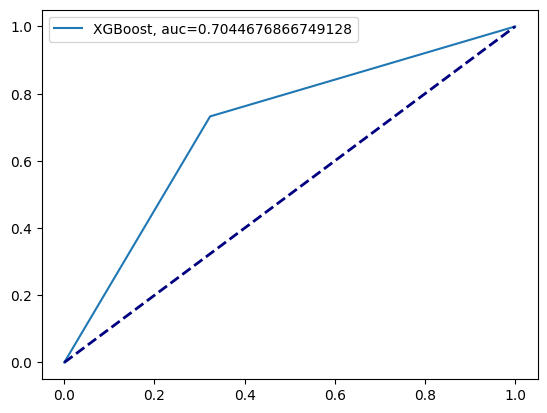

In [6]:
plt.figure(0).clf()
fpr, tpr, thresh = metrics.roc_curve(test_label, predicitions)
auc = metrics.roc_auc_score(test_label, predicitions)
plt.plot(fpr,tpr,label="XGBoost, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=0)